In [198]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from subprocess import check_output
%matplotlib inline
import matplotlib.pyplot as plt

import os
import gc

import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from bs4 import BeautifulSoup
import re
from nltk.corpus import stopwords

import spacy
from tqdm import tqdm
from sklearn.model_selection import train_test_split

from sklearn.linear_model import SGDClassifier

from sklearn import model_selection
from sklearn.linear_model import LogisticRegression

from sklearn.calibration import CalibratedClassifierCV

from sklearn.metrics import confusion_matrix
from sklearn.metrics.classification import accuracy_score, log_loss


In [199]:
raw = pd.read_csv('urdu.csv',header=None,names=['text', 'Target','na'])


In [200]:
raw.drop("na" , inplace=True, axis =1)

In [201]:
raw.head(10)

,text,Target
0,Sai kha ya her kisi kay bus ki bat nhi hai lak...,Positive
1,sahi bt h,Positive
2,"Kya bt hai,",Positive
3,Wah je wah,Positive
4,Are wha kaya bat hai,Positive
5,Wah kya baat likhi,Positive
6,Wha Itni sari khubiya,Positive
7,Itni khubiya,Positive
8,Ya allah rehm farma hm sab pe or zalimo ko hid...,Positive
9,Please Everyone AllAh S.w.T ka naam hAmesha Ba...,Positive


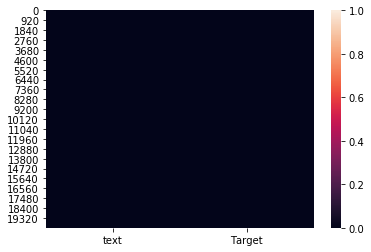

In [202]:
sns.heatmap(raw.isnull())

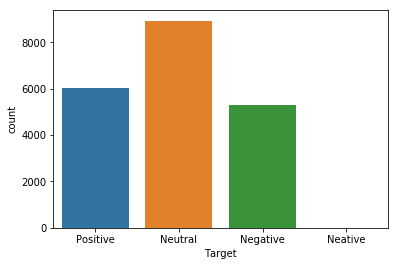

In [203]:
sns.countplot(x='Target',data=raw)

In [204]:
SAFE_DIV = 0.0001 



def preprocess(x):
    x = str(x).lower()
    x = x.replace(",000,000", "m").replace(",000", "k").replace("′", "'").replace("’", "'")\
                           .replace("bt", "but").replace("MASHA'ALLAH", "mashallah").replace("INSHA'ALLAH", "inshallah")\
                           .replace("n't", " not").replace("what's", "what is").replace("it's", "it is")\
                           .replace("'ve", " have").replace("i'm", "i am").replace("'re", " are")\
                           .replace("he's", "he is").replace("she's", "she is").replace("'s", " own")\
                           .replace("%", " percent ").replace("₹", " rupee ").replace("$", " dollar ")\
                           .replace("€", " euro ").replace("'ll", " will")
    x = re.sub(r"([0-9]+)000000", r"\1m", x)
    x = re.sub(r"([0-9]+)000", r"\1k", x)
    x = re.sub(r"http\S+", "", x)
    
    porter = PorterStemmer()
    pattern = re.compile('\W')
    
    if type(x) == type(''):
        x = re.sub(pattern, ' ', x)
    
    
    if type(x) == type(''):
        x = porter.stem(x)
        example1 = BeautifulSoup(x)
        x = example1.get_text()
               
    
    return x
    

In [205]:
raw['text'] = raw['text'].apply(lambda x: preprocess(x))

In [206]:
raw['text'][218]

'saif tumhry kapry nusrat api pehan sakti hain   nhi na    tu phir   '

In [207]:
negative = raw[raw['Target']=='Negative']['text']
positive = raw[raw['Target']=='Positive']['text']
neutral = raw[raw['Target']=='Neutral']['text']



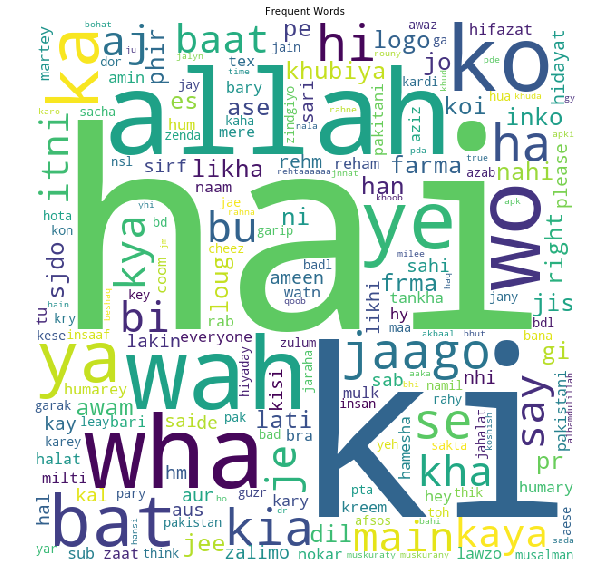

In [208]:
import matplotlib.pyplot as plt
fig, (ax1) = plt.subplots(1, figsize=[16, 10])
wordcloud = WordCloud( background_color='white',
                        width=600,
                        height=600).generate(" ".join(positive[:30]))
ax1.imshow(wordcloud)
ax1.axis('off')
ax1.set_title('Frequent Words',fontsize=10);

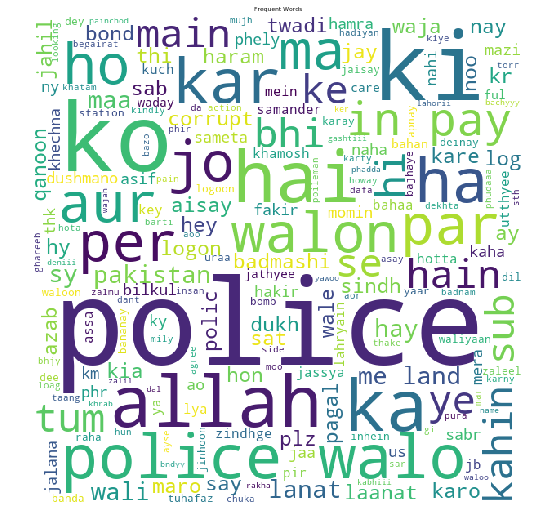

In [209]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
fig, (ax1) = plt.subplots(1, figsize=[9, 9])
wordcloud = WordCloud( background_color='white',
                        width=600,
                        height=600).generate(" ".join(negative[:30]))
ax1.imshow(wordcloud)
ax1.axis('off')
ax1.set_title('Frequent Words',fontsize=6);

In [210]:
raw['Target'].replace(to_replace='Negative',value=0,inplace=True)

In [211]:
raw['Target'].replace(to_replace='Positive',value=1,inplace=True)
raw['Target'].replace(to_replace='Neutral',value=3,inplace=True)

In [212]:
raw['Target'].replace(to_replace='Neative',value=0,inplace=True)

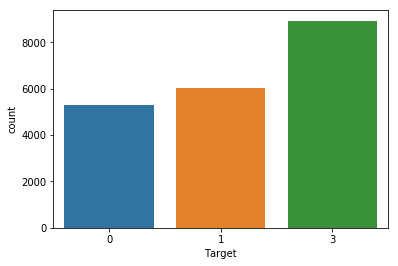

In [213]:
sns.countplot(x='Target',data=raw,)

In [ ]:
r

In [288]:
from sklearn.feature_extraction.text import TfidfVectorizer
vector= TfidfVectorizer()
data = vector.fit_transform(raw['text'])

In [289]:
from sklearn.externals import joblib
joblib.dump(vector, 'vector.pkl')


['vector.pkl']

In [290]:
print(data.shape)

(20229, 32321)


In [291]:
y_true =raw['Target'].values
y_true=y_true.astype('int')


In [292]:
from sklearn.model_selection import train_test_split

In [293]:
X_train, X_test, y_train, y_test = train_test_split(data, y_true, test_size=0.33, random_state=42)

In [294]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
nb.fit(X_train, y_train)
joblib.dump(nb, 'model.pkl')


['model.pkl']

In [295]:
def predict(string):
    clf = joblib.load('model.pkl')
    vector = joblib.load('vector.pkl')
    text = preprocess(string)
    test_vect = vector.transform(([text]))
    pred = clf.predict(test_vect)
    print(pred)
    if pred==0:
        prediction = "Negative"
    elif pred==1:
        prediction = "Positive"
        return prediction
    elif pred==3:
        prediction = "Neutral"
    return prediction

In [299]:
s='Meri london tou  mai koi kahi nahi gyaa'

In [300]:
preddd  =  predict(s)

[0]


In [296]:
cm = nb.predict(X_test)

In [297]:
cm1=confusion_matrix(y_test,y_pred= cm)

In [298]:
from sklearn.metrics import classification_report

print(classification_report(y_test, cm))


              precision    recall  f1-score   support

           0       0.81      0.24      0.37      1744
           1       0.70      0.52      0.60      1954
           3       0.56      0.89      0.69      2978

   micro avg       0.61      0.61      0.61      6676
   macro avg       0.69      0.55      0.55      6676
weighted avg       0.67      0.61      0.58      6676

